In [96]:
#   Assignment 06 - Data Analytics III

#   1. Implement Simple Naive Bayes classification algorithm using Python on iris.csv dataset
#   2. Compute Confusion Matrix to find TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall on the given dataset.

In [97]:
#   import dependencies
import pandas as pd
import numpy as np
import seaborn as sns

#   load iris dataset from seaborn library
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [98]:
#   define features and labels to be used for model creation
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = pd.DataFrame(data=iris, columns=features).values
Y = iris["species"]

In [99]:
#   divide the data into training and testing datasets using sklearn library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [100]:
#   Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [101]:
#   Fitting Naive Bayes Classification to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model = nb.fit(X_train, y_train)

In [102]:
#   Predict the Test Set result
y_predicted = nb.predict(X_test)
y_predicted

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

In [103]:
#   Creating Confusion Matrix from Testing Set and Predicted Values
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


'The diagonal elements represent the number of points for which the predicted label is equal to the true label,\nwhile off-diagonal elements are those that are mislabeled by the classifier.\nThe higher the diagonal values of the confusion matrix the better, indicating many correct predictions.'

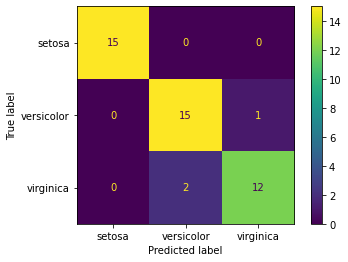

In [104]:
#   Display of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

'''The diagonal elements represent the number of points for which the predicted label is equal to the true label,
while off-diagonal elements are those that are mislabeled by the classifier.
The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.'''


In [105]:
#   importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predicted)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predicted, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predicted, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predicted, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predicted, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predicted, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predicted, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predicted, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predicted, average='weighted')))

#   Confusion Matrix Report
from sklearn.metrics import classification_report
print("\n CLASSIFICATION REPORT: \n")
print(classification_report(y_test, y_predicted, target_names=['setosa', 'versicolor', 'virginica']))


Accuracy: 0.93

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.93
Macro F1-score: 0.93

Weighted Precision: 0.93
Weighted Recall: 0.93
Weighted F1-score: 0.93

 CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [106]:
#   FP FN TP and TN from the confusion matrix
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

cm_values = TP, FP, FN, TN


In [107]:
#   Creating a Pandas Dataframe to Display TP, FP, TN, FN of iris dataset
df = pd.DataFrame(data=cm_values, columns=['setosa', 'versicolor', 'virginica'], index=['TP','FP','FN','TN'])
df

,setosa,versicolor,virginica
TP,15,15,12
FP,0,2,1
FN,0,1,2
TN,30,27,30


In [ ]:
# Reference Link : Towards Data Science - Naive Bayes
# https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf